## Using regionmask to extract data from a specific country

The python package regionmask makes it easy to mask a netcdf with a specific country or another region. Its main advantage is that it performs the step of rasterising a shapefile for you, and will give you a DataArray mask with the same dimensions/co-ordinates as your input dataset.

* It already contains shapefiles so you don't need to download it yourself.
* But if you want you can also use your own shapefiles.

Here is an example of extracting PM2.5 data from Russia

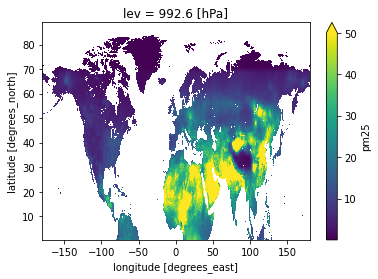

In [9]:
import regionmask
import xarray as xr

# replace with your netcdf
da = xr.open_dataarray('/nfs/a340/eebjs/hiadata/pm25_annual_means_sigmasked/pm25_2003_fireon.nc')

# make a plot to show what the data originally looks like
da.plot.imshow(vmax=50)

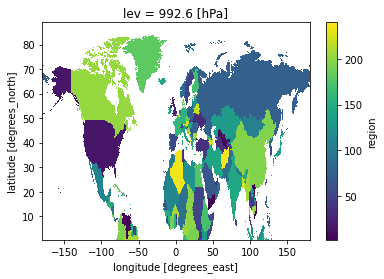

In [10]:
# extract the regionmask of your choice
# here I choose countries at 1:50m resolution
countrymask = regionmask.defined_regions.natural_earth_v5_0_0.countries_50

# create a mask from your xarray DataArray
mask = countrymask.mask(da)
mask.plot.imshow()

This returns a mask with a different number for each country. You can lookup the number that corresponds to each country in multiple ways, e.g.

In [ ]:
print(countrymask.map_keys('GB'))

or getting a dataframe of the mask

In [17]:
df = countrymask.to_dataframe()
print(df.loc[df.names == 'United Kingdom'])

        abbrevs           names
numbers                        
31           GB  United Kingdom


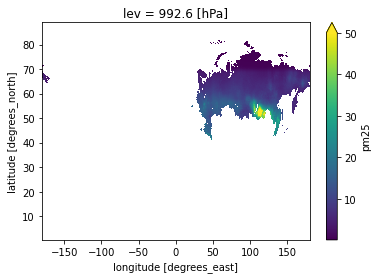

In [18]:
# then you can use the mask to select a country
# for example if you want Russia
russia_id = countrymask.map_keys('RUS')

# then you can use this to mask your DataArray
da_masked = da.where(mask == russia_id)

da_masked.plot.imshow(vmax=50)